In [64]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('./src')

import simulation as sim
import constant as ct
from PoissonNeuron import PoissonNeuron
from TwoPopulationSimulation import TwoPopulationSimulation

In [65]:
speed = 1e-2  # Constant speed
max_delta_theta = np.pi/60

# 3.1

(10000,) (10000, 2)


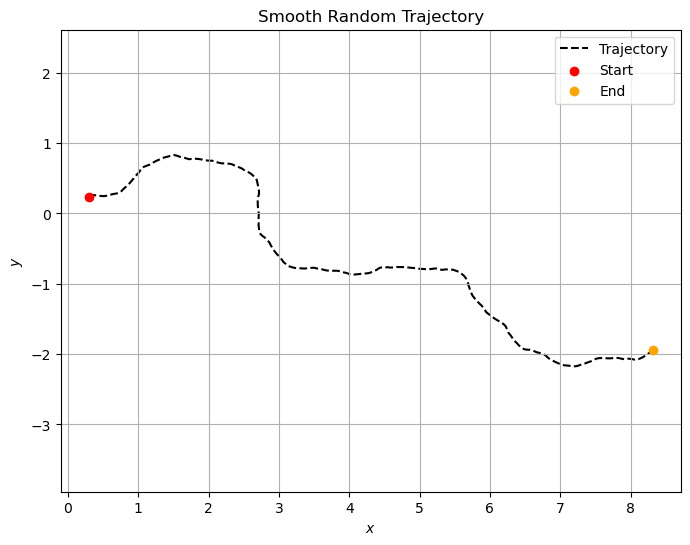

In [66]:
head_directions, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)
print(head_directions.shape, positions.shape)

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
plt.scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
plt.scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Smooth Random Trajectory')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

(100, 1)


C:\Users\camil\AppData\Local\Temp\ipykernel_14908\3277479281.py:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ax.text(np.math.radians(label_position-10),(ax.get_rmax()+2)/2.,'Time (ms)',


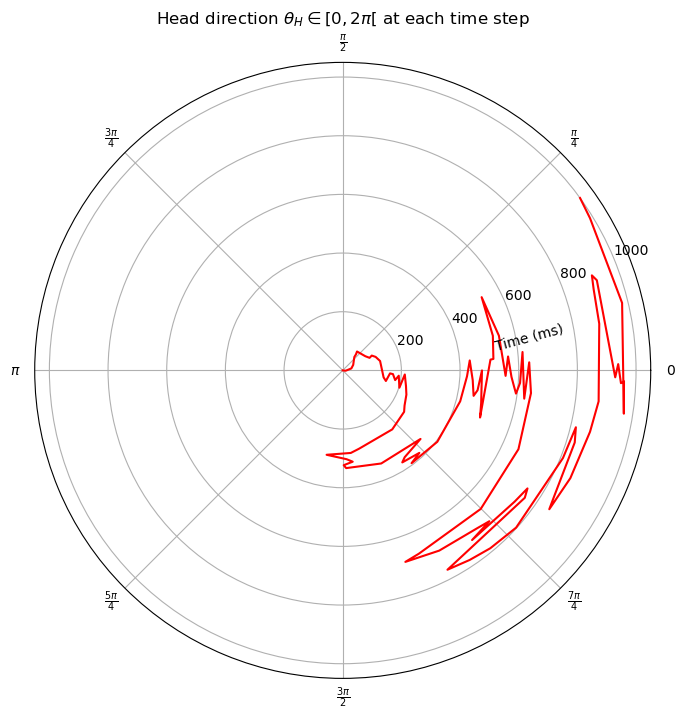

In [67]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

head_dir_smooth = sim.bins_spike(head_directions, 10, ct.delta_t, 1, mean=True)
print(head_dir_smooth.shape)
ax.plot(head_dir_smooth, np.linspace(0, ct.T, len(head_dir_smooth)), color='red')

label_position=ax.get_rlabel_position()
ax.text(np.math.radians(label_position-10),(ax.get_rmax()+2)/2.,'Time (ms)',
        rotation= 15, ha='left',va='center')

# Set angular ticks to radians
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))  # Set ticks at 0, pi/4, pi/2, 3pi/4, pi, 5pi/4, 3pi/2, 7pi/4
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$'])
# Show the plot
plt.title(r'Head direction $\theta_H \in [0, 2\pi[$ at each time step')
plt.show()


# 3.2

In [68]:
head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)
network = PoissonNeuron(I_0=1, theta_H=head_dirs)
h,s = network.spike_simulation(input_fct=network.head_external_input, initial_voltage=np.random.uniform(0, 1, ct.N))

h10 = sim.bins_spike(head_dirs, 10, N=1, mean=True)
s10 = sim.bins_spike(s, 10, N=ct.N)
bump_loc = sim.get_bump(s10)

100%|██████████| 9999/9999 [00:00<00:00, 20570.94it/s]


C:\Users\camil\AppData\Local\Temp\ipykernel_14908\3351238080.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ax.text(np.math.radians(label_position-10),(ax.get_rmax()+2)/2.,'Time (ms)',


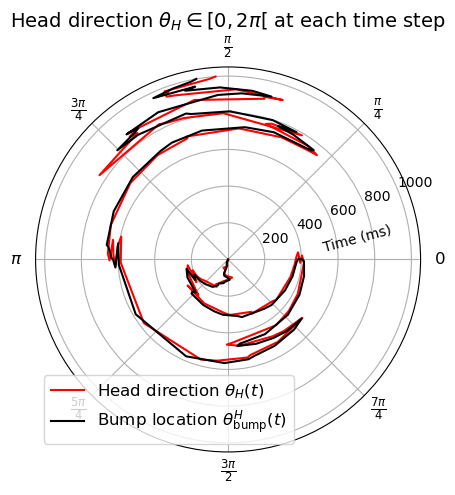

In [203]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection='polar')

ax.plot(h10, np.linspace(0, ct.T, len(h10)), color='red', label=r'Head direction $\theta_H (t)$')
ax.plot(bump_loc, np.linspace(0, ct.T, len(h10)), color='black', label=r'Bump location $\theta^H_{\text{bump}} (t)$')

label_position=ax.get_rlabel_position()
ax.text(np.math.radians(label_position-10),(ax.get_rmax()+2)/2.,'Time (ms)',
        rotation= 15, ha='left',va='center')

# Set angular ticks to radians
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))  # Set ticks at 0, pi/4, pi/2, 3pi/4, pi, 5pi/4, 3pi/2, 7pi/4
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$'], fontsize=12)
plt.title(r'Head direction $\theta_H \in [0, 2\pi[$ at each time step', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [204]:
fig.savefig('3_2.png', dpi=600)

# 3.3

In [70]:
# defining smooth random trajectory
head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)

# defining head population and running spike simulation to get spikes
head_population = PoissonNeuron(I_0=1, theta_H=head_dirs)
h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, ct.N))

# defining the integrator that uses the head population information 
integrator = TwoPopulationSimulation(J_head=1.4, head_population=head_population, J=3)
hL, sL, hR, sR = integrator.simulation(initial_voltage=integrator.centered_voltage)

print(f'Maximum of head input: {np.max(integrator.I_head)}')
print(f'Minimum of head input: {np.min(integrator.I_head)}')

100%|██████████| 9999/9999 [00:01<00:00, 5955.09it/s]

Maximum of head input: 0.6461808571599256
Minimum of head input: -0.7029364763812411


In [71]:
#fix seed
np.random.seed(3)

J_values = np.linspace(1, 2, 5)

# defining smooth random trajectory
head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)

# defining head population and running spike simulation to get spikes
head_population = PoissonNeuron(I_0=1, theta_H=head_dirs, N=500)
h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, 500))

I = []
for J in J_values:
    # defining the integrator that uses the head population information 
    integrator = TwoPopulationSimulation(J_head=J, head_population=head_population, J=3, N = 500)
    hL, sL, hR, sR = integrator.simulation(initial_voltage=integrator.centered_voltage)

    I.append(integrator.I_head)

100%|██████████| 9999/9999 [00:01<00:00, 5125.86it/s]


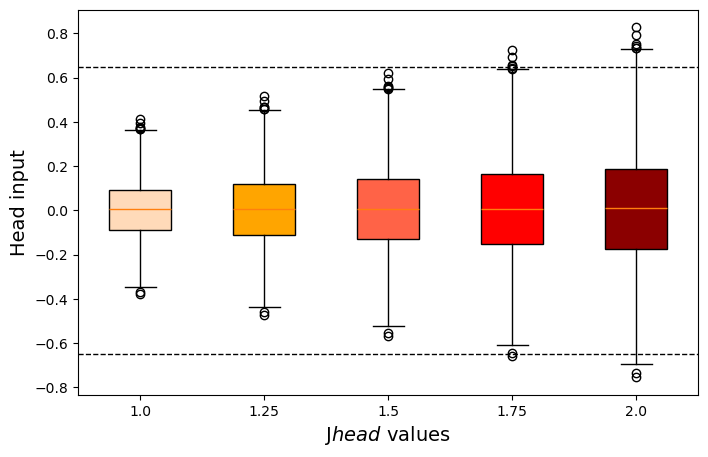

In [74]:
colors = ['peachpuff', 'orange', 'tomato', 'red', 'darkred','peachpuff', 'orange', 'tomato', 'red', 'darkred']
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylabel('Head input', fontsize=14)
ax.set_xlabel('J$head$ values', fontsize=14)
bplot = ax.boxplot(I, patch_artist=True, labels=J_values)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.axhline(y=0.65, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.65, color='black', linestyle='--', linewidth=1)

plt.show()

In [76]:
fig.savefig('3_3.png', dpi=600)

Min and max values are indeed in $[-0.5, 0.5]$

Running simulation 0.0


100%|██████████| 9999/9999 [00:01<00:00, 7532.63it/s]


Running simulation 1.0


100%|██████████| 9999/9999 [00:01<00:00, 6719.49it/s]


Running simulation 2.0


100%|██████████| 9999/9999 [00:01<00:00, 7382.12it/s]


Running simulation 3.0


100%|██████████| 9999/9999 [00:01<00:00, 6471.58it/s]


Running simulation 4.0


100%|██████████| 9999/9999 [00:01<00:00, 6219.08it/s]


Running simulation 5.0


100%|██████████| 9999/9999 [00:01<00:00, 6616.03it/s]


Running simulation 6.0


100%|██████████| 9999/9999 [00:01<00:00, 5680.16it/s]


Running simulation 7.0


100%|██████████| 9999/9999 [00:01<00:00, 6176.17it/s]


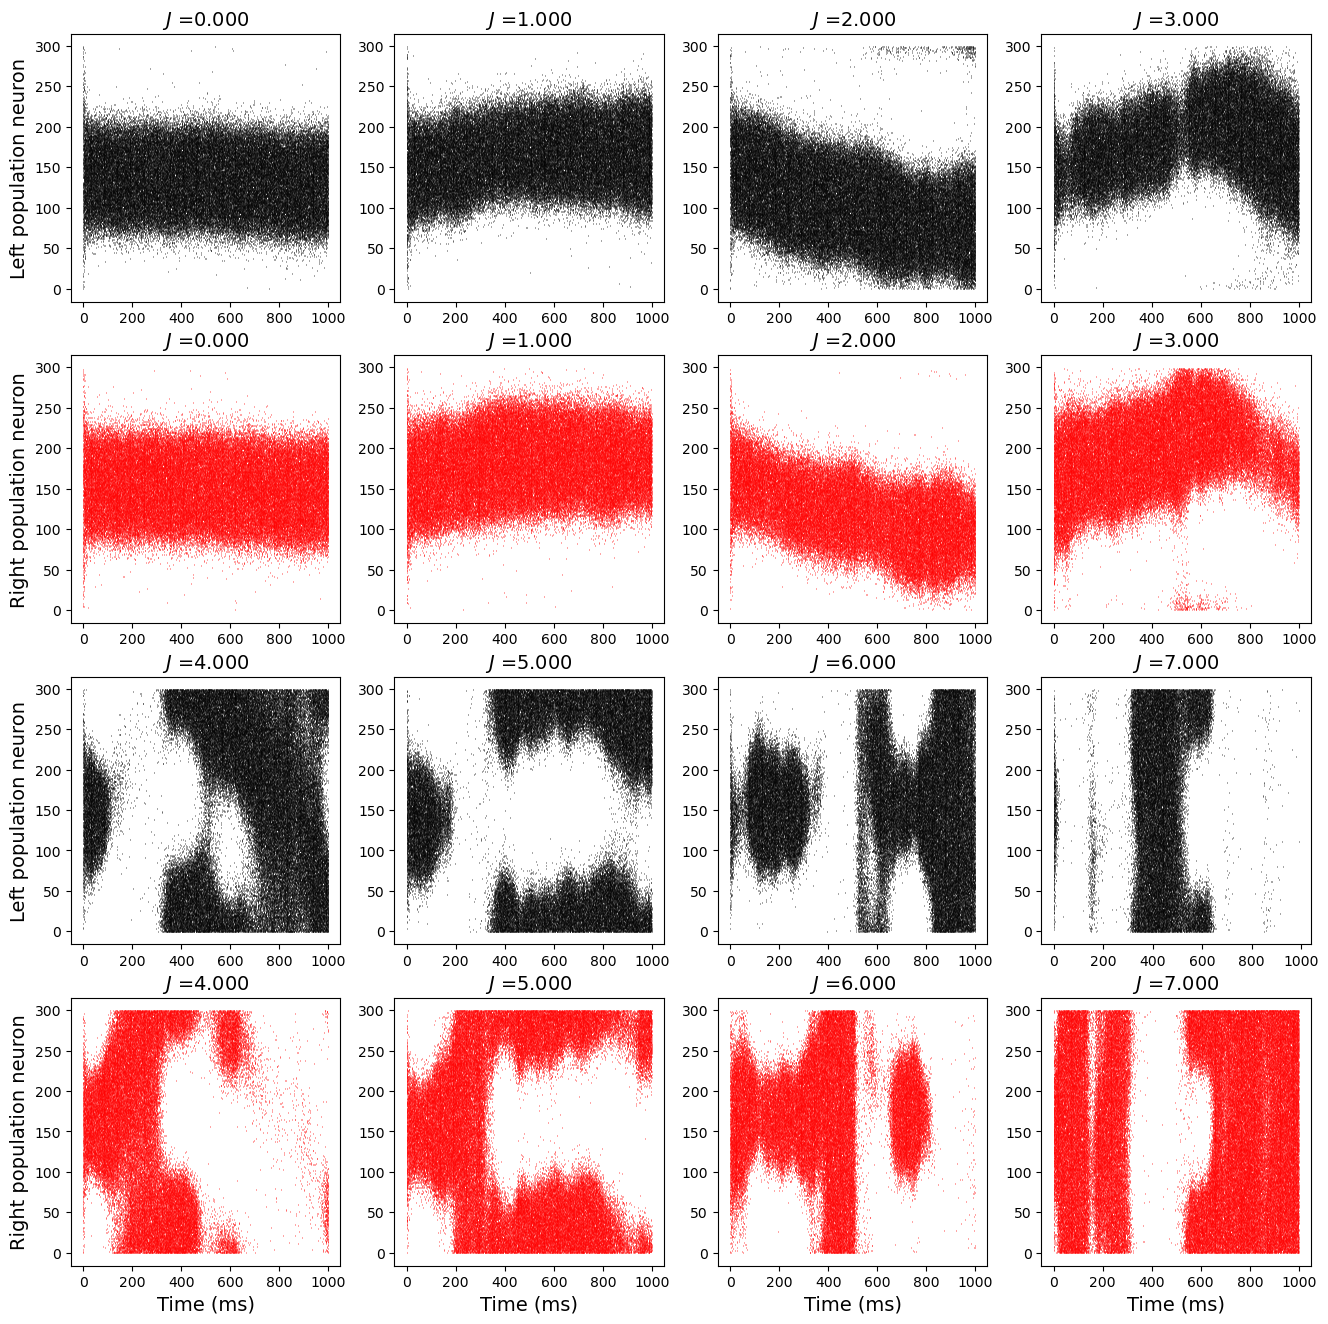

In [89]:
np.random.seed(0)

J_values = np.linspace(0, 7, 8)

fig, ax = plt.subplots(4, 4, figsize=(16, 16))

for i, J in enumerate(J_values):
    print(f'Running simulation {(J)}')
    x, y = i//4, i%4
    # defining smooth random trajectory
    head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)

    # defining head population and running spike simulation to get spikes
    head_population = PoissonNeuron(I_0=1, theta_H=head_dirs)
    h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    head_dir_smooth = sim.bins_spike(head_dirs, 10, ct.delta_t, 1, mean=True)
    # ax[2*x, y].plot(np.linspace(0, ct.T, len(head_dir_smooth)), np.cos(head_dir_smooth)*180/np.pi, color='b')    

    # defining the integrator that uses the head population information 
    integrator = TwoPopulationSimulation(J_head=J, head_population=head_population, J=3)
    hL, sL, hR, sR = integrator.simulation(initial_voltage=integrator.centered_voltage)

    sL1, sR1 = sim.bins_spike(sL, 1), sim.bins_spike(sR, 1)
    spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
    spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

    ax[2*x, y].eventplot(spike_timesL, orientation='horizontal', color='black', linewidth=0.5)
    ax[2*x+1, y].eventplot(spike_timesR, orientation='horizontal', color='red', linewidth=0.5)
    ax[2*x, y].set_title(r'$J$ =' + f'{J:.3f}', fontsize=14)
    ax[2*x+1, y].set_title(r'$J$ =' + f'{J:.3f}', fontsize=14)

for i in range(2):
    ax[2*i, 0].set_ylabel("Left population neuron", fontsize=14)
    ax[2*i+1, 0].set_ylabel("Right population neuron", fontsize=14)

for i in range(4): ax[3, i].set_xlabel('Time (ms)', fontsize=14)

In [91]:
fig.savefig('3_3_2', dpi=600)

# 3.5

In [145]:
# defining smooth random trajectory
head_dirs, positions = sim.smooth_random_trajectory(ct.T, ct.delta_t, speed, max_delta_theta)

# defining head population and running spike simulation to get spikes
head_population = PoissonNeuron(I_0=1, theta_H=head_dirs)
h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, ct.N))
print(np.max(s))

# defining the integrator for the x value of the path
integrator_x = TwoPopulationSimulation(J_head=1.75, head_population=head_population, J=3)
hL_x, sL_x, hR_x, sR_x = integrator_x.simulation(initial_voltage=integrator_x.centered_voltage)

# defining the integrator for the y value of the path
integrator_y = TwoPopulationSimulation(J_head=1.75, head_population=head_population, x=False, J=3)
hL_y, sL_y, hR_y, sR_y = integrator_y.simulation(initial_voltage=integrator_y.centered_voltage)

100%|██████████| 9999/9999 [00:01<00:00, 6800.11it/s]


1.0


100%|██████████| 9999/9999 [00:03<00:00, 2748.49it/s]


In [146]:
sL10_x = sim.bins_spike(sL_x, 10)
sR10_x = sim.bins_spike(sR_x, 10)
sL10_y = sim.bins_spike(sL_y, 10)
sR10_y = sim.bins_spike(sR_y, 10)

bump_locationL_x = sim.get_bump(sL10_x)
bump_locationR_x = sim.get_bump(sR10_x)
bump_locationL_y = sim.get_bump(sL10_y)
bump_locationR_y = sim.get_bump(sR10_y)

time = np.linspace(0, ct.T, len(bump_locationL_x))
x = 0.5*(np.array(bump_locationL_x) + np.array(bump_locationR_x))
y = 0.5*(np.array(bump_locationL_y) + np.array(bump_locationR_y))

coefficients_x = np.polyfit(x, positions[:, 0][::100], 1)
coefficients_y = np.polyfit(y, positions[:, 1][::100], 1)
x_posi = np.poly1d(coefficients_x)
y_posi = np.poly1d(coefficients_y)

C:\Users\camil\AppData\Local\Temp\ipykernel_14908\1910913404.py:47: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  ax3.text(np.math.radians(label_position-10),(ax3.get_rmax()+2)/2.,'Time (ms)',


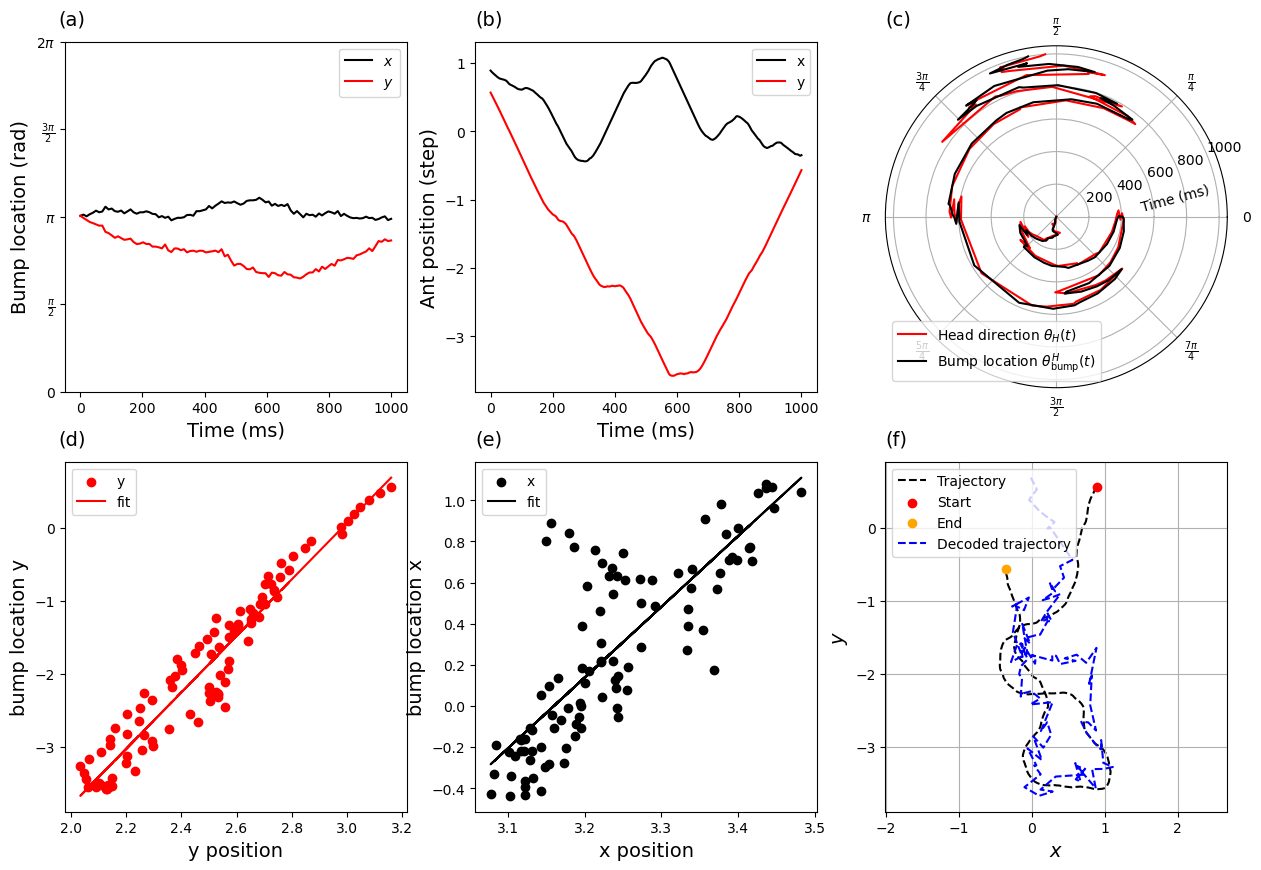

In [147]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233, projection = 'polar')
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)


ax1.plot(time,x, label=r'$x$', color='black')
ax1.plot(time,y, label=r'$y$', color='red')
ax1.set_xlabel('Time (ms)', fontsize=14)
ax1.set_ylabel('Bump location (rad)', fontsize=14)
ax1.set_yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax1.legend()
ax1.text(-0.02, 1.05, '(a)', transform=ax1.transAxes, fontsize=14)

ax2.plot(np.linspace(0, ct.T, len(positions[:,0])),positions[:,0], label='x', color='black')
ax2.plot(np.linspace(0, ct.T, len(positions[:,1])),positions[:,1], label='y', color='red')
ax2.set_xlabel('Time (ms)', fontsize=14)
ax2.set_ylabel('Ant position (step)', fontsize=14)
ax2.legend()
ax2.text(1.2, 1.05, '(b)', transform=ax1.transAxes, fontsize=14)


ax5.scatter (x, positions[:, 0][::100], marker = "o", label = "x", color = "black")
ax4.scatter (y, positions[:, 1][::100], marker = "o", label = "y", color = "red")
ax5.plot(x, x_posi(x), label = "fit", color = "black")
ax4.plot(y, y_posi(y), label = "fit", color = "red")
ax5.set_xlabel("x position", fontsize=14)
ax5.set_ylabel("bump location x", fontsize=14)
ax4.set_xlabel("y position", fontsize=14)
ax4.set_ylabel("bump location y", fontsize=14)
ax5.legend()
ax4.legend()
ax4.text(-0.02, -0.15, '(d)', transform=ax1.transAxes, fontsize=14)
ax5.text(1.2, -0.15, '(e)', transform=ax1.transAxes, fontsize=14)


h10 = sim.bins_spike(head_dirs, 10, N=1, mean=True)
s10 = sim.bins_spike(s, 10, N=ct.N)
bump_loc = sim.get_bump(s10)
ax3.plot(h10, np.linspace(0, ct.T, len(h10)), color='red', label=r'Head direction $\theta_H (t)$')
ax3.plot(bump_loc, np.linspace(0, ct.T, len(h10)), color='black', label=r'Bump location $\theta^H_{\text{bump}} (t)$')

label_position=ax3.get_rlabel_position()
ax3.text(np.math.radians(label_position-10),(ax3.get_rmax()+2)/2.,'Time (ms)',
        rotation= 15, ha='left',va='center')

# Set angular ticks to radians
ax3.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))  # Set ticks at 0, pi/4, pi/2, 3pi/4, pi, 5pi/4, 3pi/2, 7pi/4
ax3.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$'])
ax3.legend()
ax3.text(2.4, 1.05, '(c)', transform=ax1.transAxes, fontsize=14)

ax6.plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
ax6.scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
ax6.scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
ax6.plot(x_posi(x), y_posi(y), 'b--', label='Decoded trajectory')
ax6.set_xlabel(r'$x$', fontsize=14)
ax6.set_ylabel(r'$y$', fontsize=14)
ax6.legend()
ax6.grid(True)
ax6.axis('equal')
ax6.text(2.4, -0.15, '(f)', transform=ax1.transAxes, fontsize=14)

plt.legend()
plt.show()

In [148]:
# fig.savefig('3_5.png', dpi=600)

# 3.7

In [172]:
def metric_path(real_path_x, real_path_y, decoded_path_x, decoded_path_y):
    return np.sum(np.sqrt((real_path_x - decoded_path_x)**2+ (real_path_y - decoded_path_y)**2))

### tau tuning 

100%|██████████| 9999/9999 [00:04<00:00, 2282.37it/s]


38.25273112969069


100%|██████████| 9999/9999 [00:04<00:00, 2419.36it/s]


35.13241277104895


100%|██████████| 9999/9999 [00:04<00:00, 2306.14it/s]


32.17718482254151


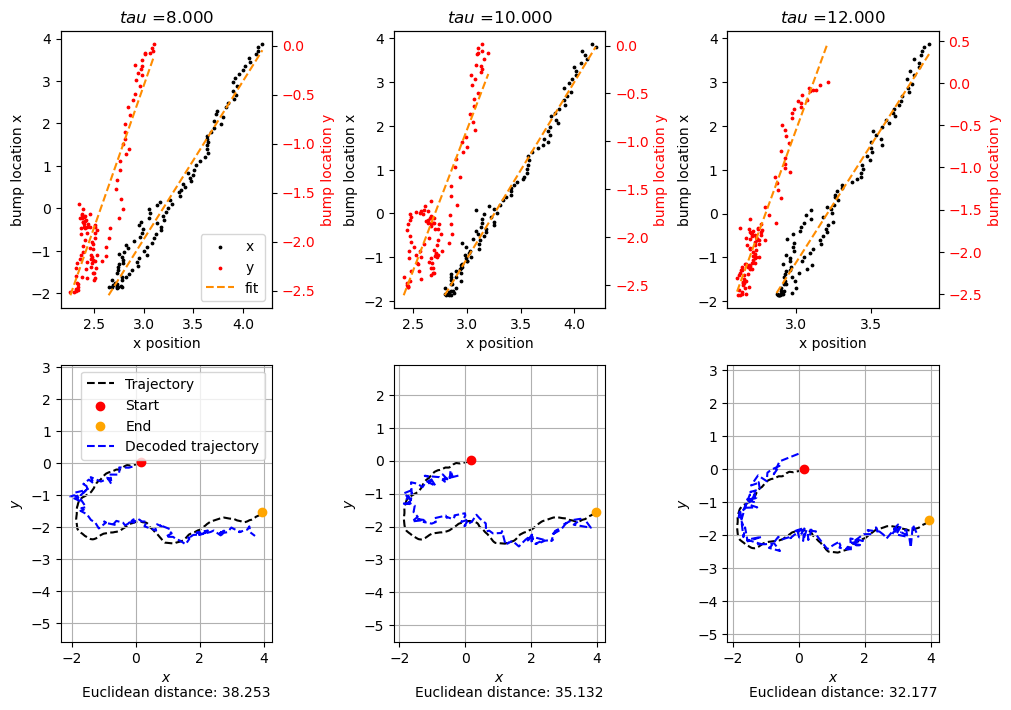

In [173]:
N = ct.N
T = ct.T
tau_list = [8, 10, 12]

fig, ax = plt.subplots(2, 3, figsize=(10, 7), constrained_layout=True)

# defining smooth random tra0ectory
head_dirs, positions = sim.smooth_random_trajectory(T, ct.delta_t, speed, max_delta_theta)


for i, tau in enumerate(tau_list):

        # defining head population and running spike simulation to get spikes
        head_population = PoissonNeuron(I_0=1, theta_H=head_dirs, N=N, T = T, tau=tau)
        h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, N))

        # defining the integrator for the x value of the path
        integrator_x = TwoPopulationSimulation(J_head=1.75, head_population=head_population, N = N, T = T, J=3, tau=tau)
        hL_x, sL_x, hR_x, sR_x = integrator_x.simulation(initial_voltage=integrator_x.centered_voltage)

        # defining the integrator for the y value of the path
        integrator_y = TwoPopulationSimulation(J_head=1.75, head_population=head_population, x=False, N = N, T = T, J=3, tau=tau)
        hL_y, sL_y, hR_y, sR_y = integrator_y.simulation(initial_voltage=integrator_y.centered_voltage)
        
        sL10_x = sim.bins_spike(sL_x, 10, N=N)
        sR10_x = sim.bins_spike(sR_x, 10, N=N)
        sL10_y = sim.bins_spike(sL_y, 10, N=N)
        sR10_y = sim.bins_spike(sR_y, 10, N=N)

        bump_locationL_x = sim.get_bump(sL10_x, N = N)
        bump_locationR_x = sim.get_bump(sR10_x, N = N)
        bump_locationL_y = sim.get_bump(sL10_y, N = N)
        bump_locationR_y = sim.get_bump(sR10_y, N = N)

        time = np.linspace(0, ct.T, len(bump_locationL_x))
        x = 0.5*(np.array(bump_locationL_x) + np.array(bump_locationR_x))
        y = 0.5*(np.array(bump_locationL_y) + np.array(bump_locationR_y))
        
        coefficients_x = np.polyfit(x, positions[:, 0][::100], 1)
        coefficients_y = np.polyfit(y, positions[:, 1][::100], 1)
        x_posi = np.poly1d(coefficients_x)
        y_posi = np.poly1d(coefficients_y)
        
        ax2 = ax[0,i].twinx()
        
        ax[0,i].set_title(r'$tau$ =' + f'{tau:.3f}')

        ax[0,i].scatter (x, positions[:, 0][::100], marker = "o", label = "x", color = "black", s=3)
        ax2.scatter (y, positions[:, 1][::100], marker = "o", label = "y", color = "red", s=3)
        
        x_fit = np.linspace (min(x), max(x), 1000)
        y_fit = np.linspace (min(y), max(y), 1000)
        ax[0,i].plot(x_fit, x_posi(x_fit), label = "fit", color = "darkorange", ls='--')
        ax2.plot(y_fit, y_posi(y_fit), label = "fit", color = "darkorange", ls='--')
        ax2.tick_params(axis='y', labelcolor='red')
        ax[0,i].tick_params(axis='y', labelcolor='black')
        ax[0,i].set_xlabel("x position")
        ax[0,i].set_ylabel("bump location x", color='black')
        ax2.set_xlabel("y position")
        ax2.set_ylabel("bump location y", color='red')

        handles1, labels1 = ax[0,i].get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        handles = [handles1[0]] + handles2
        labels = [labels1[0]]+ labels2
        ax[0,0].legend(handles, labels, loc='lower right')

        ax[1,i].plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
        ax[1,i].scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
        ax[1,i].scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
        ax[1,i].plot(x_posi(x), y_posi(y), 'b--', label='Decoded trajectory')
        ax[1,i].set_xlabel(r'$x$')
        ax[1,i].set_ylabel(r'$y$')
        ax[1,0].legend()
        ax[1,i].grid(True)
        ax[1,i].axis('equal')
        
        print(metric_path(positions[:,0][::100], positions[:,1][::100], x_posi(x), y_posi(y)))
        ax[1,i].text(0.1, -0.2, f'Euclidean distance: { metric_path(positions[:,0][::100], positions[:,1][::100], x_posi(x), y_posi(y)):.3f}', transform=ax[1,i].transAxes)

plt.show()



In [174]:
N = ct.N
T = ct.T
tau_list = [8,9, 10,11, 12]

error_tau = np.zeros((len(tau_list), 10))
for trial in range(10):
    head_dirs, positions = sim.smooth_random_trajectory(T, ct.delta_t, speed, max_delta_theta)
    for i, tau in enumerate(tau_list):

            # defining head population and running spike simulation to get spikes
            head_population = PoissonNeuron(I_0=1, theta_H=head_dirs, N=N, T = T, tau=tau)
            h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, N))

            # defining the integrator for the x value of the path
            integrator_x = TwoPopulationSimulation(J_head=1.75, head_population=head_population, N = N, T = T, J=3, tau=tau)
            hL_x, sL_x, hR_x, sR_x = integrator_x.simulation(initial_voltage=integrator_x.centered_voltage)

            # defining the integrator for the y value of the path
            integrator_y = TwoPopulationSimulation(J_head=1.75, head_population=head_population, x=False, N = N, T = T, J=3, tau=tau)
            hL_y, sL_y, hR_y, sR_y = integrator_y.simulation(initial_voltage=integrator_y.centered_voltage)
            
            sL10_x = sim.bins_spike(sL_x, 10, N=N)
            sR10_x = sim.bins_spike(sR_x, 10, N=N)
            sL10_y = sim.bins_spike(sL_y, 10, N=N)
            sR10_y = sim.bins_spike(sR_y, 10, N=N)

            bump_locationL_x = sim.get_bump(sL10_x, N = N)
            bump_locationR_x = sim.get_bump(sR10_x, N = N)
            bump_locationL_y = sim.get_bump(sL10_y, N = N)
            bump_locationR_y = sim.get_bump(sR10_y, N = N)

            time = np.linspace(0, ct.T, len(bump_locationL_x))
            x = 0.5*(np.array(bump_locationL_x) + np.array(bump_locationR_x))
            y = 0.5*(np.array(bump_locationL_y) + np.array(bump_locationR_y))
            
            coefficients_x = np.polyfit(x, positions[:, 0][::100], 1)
            coefficients_y = np.polyfit(y, positions[:, 1][::100], 1)
            x_posi = np.poly1d(coefficients_x)
            y_posi = np.poly1d(coefficients_y)
            
            error_tau[i, trial] = metric_path(positions[:,0][::100], positions[:,1][::100], x_posi(x), y_posi(y))

print(np.mean(error_tau, axis=1))

100%|██████████| 9999/9999 [00:01<00:00, 5514.34it/s]


[42.56853918 41.63166581 47.57840657 41.7318425  37.17629038]


### theta tuning

100%|██████████| 9999/9999 [00:01<00:00, 6797.44it/s]


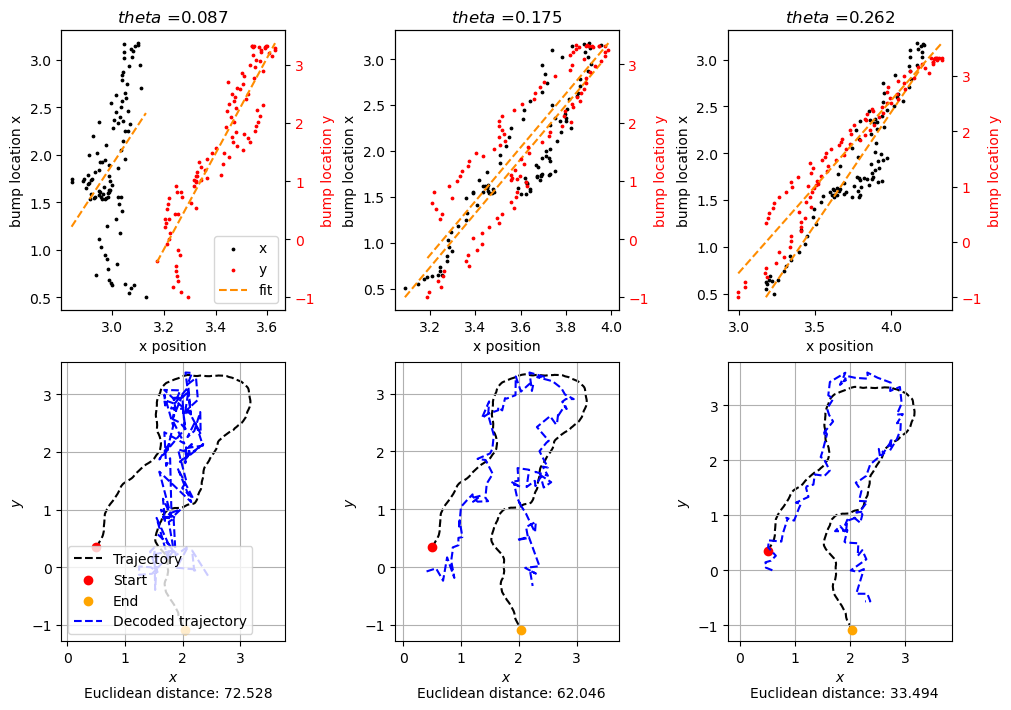

In [175]:
N = ct.N
T = ct.T
theta_list = [5*np.pi/180, 10*np.pi/180, 15*np.pi/180]

fig, ax = plt.subplots(2, 3, figsize=(10, 7), constrained_layout=True)
# plt.tight_layout()
# fig.set_constrained_layout_pads(w_pad=0, h_pad=0, wspace=0.5, hspace=3000)

# defining smooth random tra0ectory
head_dirs, positions = sim.smooth_random_trajectory(T, ct.delta_t, speed, max_delta_theta)

for i, theta in enumerate(theta_list):
        
        # defining head population and running spike simulation to get spikes
        head_population = PoissonNeuron(I_0=1, theta_H=head_dirs, N=N, T = T)
        h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, N))

        # defining the integrator for the x value of the path
        integrator_x = TwoPopulationSimulation(J_head=1.75, head_population=head_population, N = N, T = T, J=3, theta=theta)
        hL_x, sL_x, hR_x, sR_x = integrator_x.simulation(initial_voltage=integrator_x.centered_voltage)

        # defining the integrator for the y value of the path
        integrator_y = TwoPopulationSimulation(J_head=1.75, head_population=head_population, x=False, N = N, T = T, J=3, theta=theta)
        hL_y, sL_y, hR_y, sR_y = integrator_y.simulation(initial_voltage=integrator_y.centered_voltage)
        
        sL10_x = sim.bins_spike(sL_x, 10, N=N)
        sR10_x = sim.bins_spike(sR_x, 10, N=N)
        sL10_y = sim.bins_spike(sL_y, 10, N=N)
        sR10_y = sim.bins_spike(sR_y, 10, N=N)

        bump_locationL_x = sim.get_bump(sL10_x, N = N)
        bump_locationR_x = sim.get_bump(sR10_x, N = N)
        bump_locationL_y = sim.get_bump(sL10_y, N = N)
        bump_locationR_y = sim.get_bump(sR10_y, N = N)

        time = np.linspace(0, ct.T, len(bump_locationL_x))
        x = 0.5*(np.array(bump_locationL_x) + np.array(bump_locationR_x))
        y = 0.5*(np.array(bump_locationL_y) + np.array(bump_locationR_y))
        
        coefficients_x = np.polyfit(x, positions[:, 0][::100], 1)
        coefficients_y = np.polyfit(y, positions[:, 1][::100], 1)
        x_posi = np.poly1d(coefficients_x)
        y_posi = np.poly1d(coefficients_y)
        
        ax2 = ax[0,i].twinx()
        
        ax[0,i].set_title(r'$theta$ =' + f'{theta:.3f}')

        ax[0,i].scatter (x, positions[:, 0][::100], marker = "o", label = "x", color = "black", s=3)
        ax2.scatter (y, positions[:, 1][::100], marker = "o", label = "y", color = "red", s=3)
        
        x_fit = np.linspace (min(x), max(x), 1000)
        y_fit = np.linspace (min(y), max(y), 1000)
        ax[0,i].plot(x_fit, x_posi(x_fit), label = "fit", color = "darkorange", ls='--')
        ax2.plot(y_fit, y_posi(y_fit), label = "fit", color = "darkorange", ls='--')
        ax2.tick_params(axis='y', labelcolor='red')
        ax[0,i].tick_params(axis='y', labelcolor='black')
        ax[0,i].set_xlabel("x position")
        ax[0,i].set_ylabel("bump location x", color='black')
        ax2.set_xlabel("y position")
        ax2.set_ylabel("bump location y", color='red')

        handles1, labels1 = ax[0,i].get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        handles = [handles1[0]] + handles2
        labels = [labels1[0]]+ labels2
        ax[0,0].legend(handles, labels, loc='lower right')

        ax[1,i].plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
        ax[1,i].scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
        ax[1,i].scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
        ax[1,i].plot(x_posi(x), y_posi(y), 'b--', label='Decoded trajectory')
        ax[1,i].set_xlabel(r'$x$')
        ax[1,i].set_ylabel(r'$y$')
        ax[1,0].legend()
        ax[1,i].grid(True)
        ax[1,i].axis('equal')
        
        ax[1,i].text(0.1, -0.2, f'Euclidean distance: { metric_path(positions[:,0][::100], positions[:,1][::100], x_posi(x), y_posi(y)):.3f}', transform=ax[1,i].transAxes)

plt.show()

In [177]:
N = ct.N
T = ct.T
theta_list = [5*np.pi/180, 10*np.pi/180, 15*np.pi/180]

error_theta = np.zeros((len(theta_list), 10))
for trial in range(10):
    head_dirs, positions = sim.smooth_random_trajectory(T, ct.delta_t, speed, max_delta_theta)
    for i, theta in enumerate(theta_list):

             # defining head population and running spike simulation to get spikes
            head_population = PoissonNeuron(I_0=1, theta_H=head_dirs, N=N, T = T)
            h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, N))

            # defining the integrator for the x value of the path
            integrator_x = TwoPopulationSimulation(J_head=1.75, head_population=head_population, N = N, T = T, J=3, theta=theta)
            hL_x, sL_x, hR_x, sR_x = integrator_x.simulation(initial_voltage=integrator_x.centered_voltage)

            # defining the integrator for the y value of the path
            integrator_y = TwoPopulationSimulation(J_head=1.75, head_population=head_population, x=False, N = N, T = T, J=3, theta=theta)
            hL_y, sL_y, hR_y, sR_y = integrator_y.simulation(initial_voltage=integrator_y.centered_voltage)
            
            sL10_x = sim.bins_spike(sL_x, 10, N=N)
            sR10_x = sim.bins_spike(sR_x, 10, N=N)
            sL10_y = sim.bins_spike(sL_y, 10, N=N)
            sR10_y = sim.bins_spike(sR_y, 10, N=N)

            bump_locationL_x = sim.get_bump(sL10_x, N = N)
            bump_locationR_x = sim.get_bump(sR10_x, N = N)
            bump_locationL_y = sim.get_bump(sL10_y, N = N)
            bump_locationR_y = sim.get_bump(sR10_y, N = N)

            time = np.linspace(0, ct.T, len(bump_locationL_x))
            x = 0.5*(np.array(bump_locationL_x) + np.array(bump_locationR_x))
            y = 0.5*(np.array(bump_locationL_y) + np.array(bump_locationR_y))
            
            coefficients_x = np.polyfit(x, positions[:, 0][::100], 1)
            coefficients_y = np.polyfit(y, positions[:, 1][::100], 1)
            x_posi = np.poly1d(coefficients_x)
            y_posi = np.poly1d(coefficients_y)
            
            error_theta[i, trial] = metric_path(positions[:,0][::100], positions[:,1][::100], x_posi(x), y_posi(y))

print(np.mean(error_theta, axis=1))

100%|██████████| 9999/9999 [00:01<00:00, 8444.16it/s]

[63.16331794 35.82149737 27.68798788]


### Try with larger number of neurons and T

100%|██████████| 39999/39999 [00:26<00:00, 1521.96it/s]


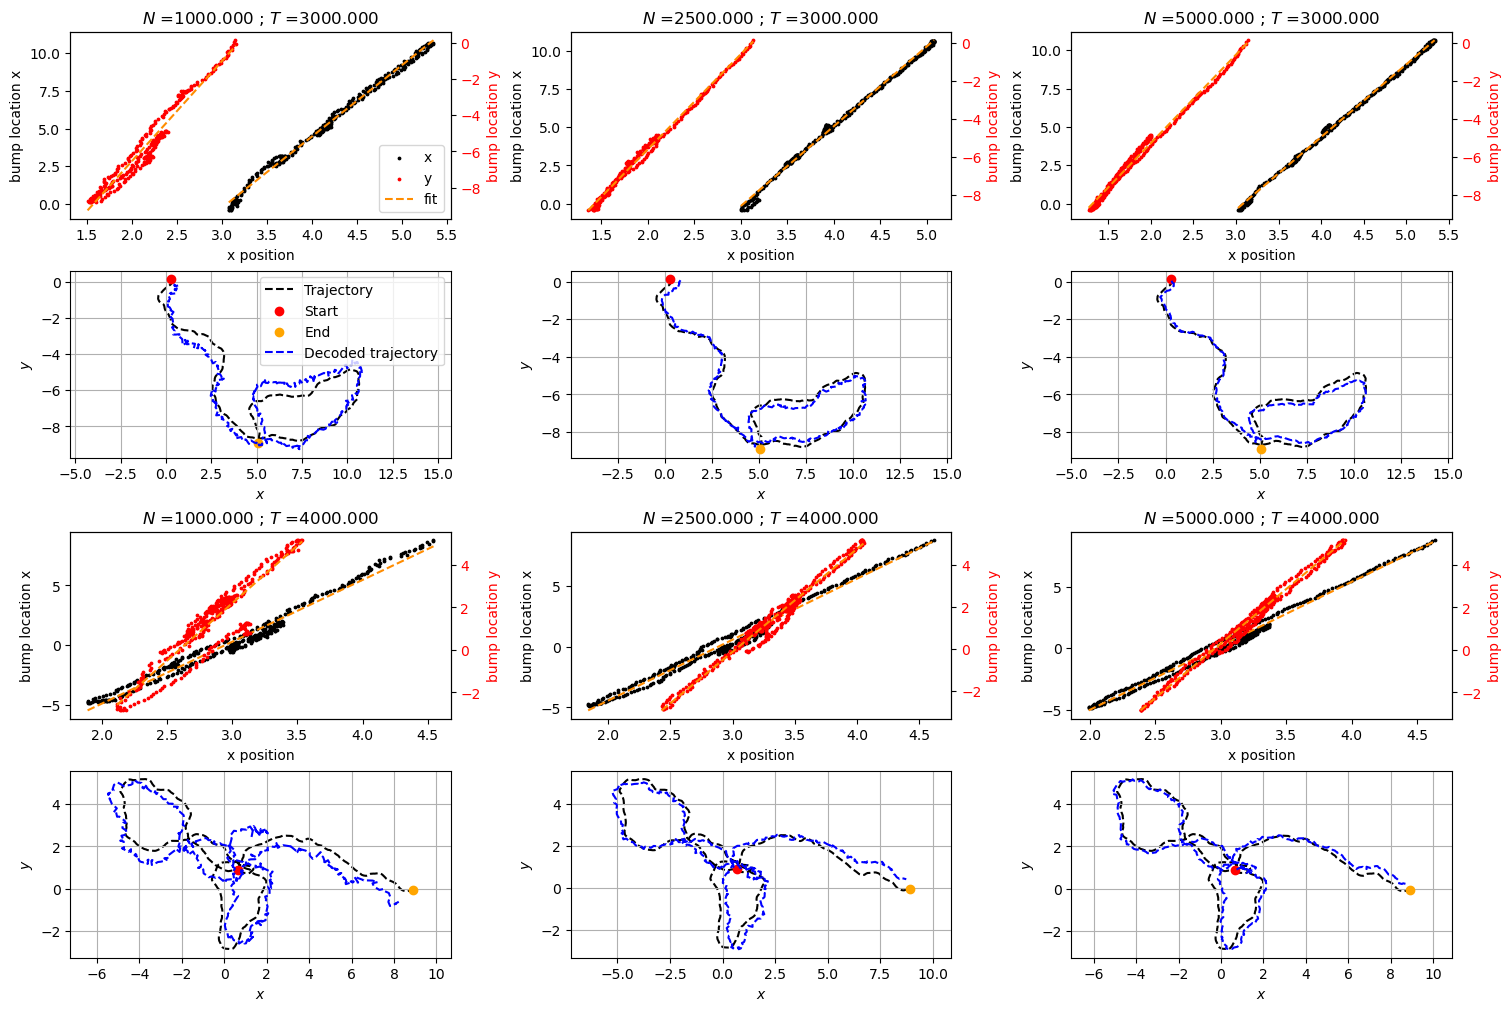

In [58]:
N_list = [1000, 2500, 5000]
time_list = [3000, 4000]

fig, ax = plt.subplots(4, 3, figsize=(15, 10), constrained_layout=True)
# plt.tight_layout()
# fig.set_constrained_layout_pads(w_pad=0, h_pad=0, wspace=0.5, hspace=3000)
# defining smooth random trajectory
  
for i, T in enumerate(time_list):      
    head_dirs, positions = sim.smooth_random_trajectory(T, ct.delta_t, speed, max_delta_theta)
    for j, N in enumerate(N_list):
    
        # defining head population and running spike simulation to get spikes
        head_population = PoissonNeuron(I_0=1, theta_H=head_dirs, N=N, T = T)
        h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, N))

        # defining the integrator for the x value of the path
        integrator_x = TwoPopulationSimulation(J_head=1.75, head_population=head_population, N = N, T = T, J=3)
        hL_x, sL_x, hR_x, sR_x = integrator_x.simulation(initial_voltage=integrator_x.centered_voltage)

        # defining the integrator for the y value of the path
        integrator_y = TwoPopulationSimulation(J_head=1.75, head_population=head_population, x=False, N = N, T = T, J=3)
        hL_y, sL_y, hR_y, sR_y = integrator_y.simulation(initial_voltage=integrator_y.centered_voltage)
        
        sL10_x = sim.bins_spike(sL_x, 10, N=N)
        sR10_x = sim.bins_spike(sR_x, 10, N=N)
        sL10_y = sim.bins_spike(sL_y, 10, N=N)
        sR10_y = sim.bins_spike(sR_y, 10, N=N)

        bump_locationL_x = sim.get_bump(sL10_x, N = N)
        bump_locationR_x = sim.get_bump(sR10_x, N = N)
        bump_locationL_y = sim.get_bump(sL10_y, N = N)
        bump_locationR_y = sim.get_bump(sR10_y, N = N)

        time = np.linspace(0, ct.T, len(bump_locationL_x))
        x = 0.5*(np.array(bump_locationL_x) + np.array(bump_locationR_x))
        y = 0.5*(np.array(bump_locationL_y) + np.array(bump_locationR_y))
        
        coefficients_x = np.polyfit(x, positions[:, 0][::100], 1)
        coefficients_y = np.polyfit(y, positions[:, 1][::100], 1)
        x_posi = np.poly1d(coefficients_x)
        y_posi = np.poly1d(coefficients_y)
        
        ax2 = ax[2*i,j].twinx()
        
        ax[2*i, j].set_title(r'$N$ =' + f'{N:.3f} ; $T$ =' + f'{T:.3f}')
        x_fit = np.linspace (min(x), max(x), 1000)
        y_fit = np.linspace (min(y), max(y), 1000)
        ax[2*i,j].scatter (x, positions[:, 0][::100], marker = "o", label = "x", color = "black", s=3)
        ax2.scatter (y, positions[:, 1][::100], marker = "o", label = "y", color = "red", s=3)
        ax[2*i,j].plot(x_fit, x_posi(x_fit), label = "fit", color = "darkorange", ls='--')
        ax2.plot(y_fit, y_posi(y_fit), label = "fit", color = "darkorange", ls='--')
        ax2.tick_params(axis='y', labelcolor='red')
        ax[2*i,j].tick_params(axis='y', labelcolor='black')
        ax[2*i,j].set_xlabel("x position")
        ax[2*i,j].set_ylabel("bump location x", color='black')
        ax2.set_xlabel("y position")
        ax2.set_ylabel("bump location y", color='red')

        handles1, labels1 = ax[2*i,j].get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        handles = [handles1[0]] + handles2
        labels = [labels1[0]]+ labels2
        ax[0,0].legend(handles, labels, loc='lower right')

        ax[2*i+1,j].plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
        ax[2*i+1,j].scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
        ax[2*i+1,j].scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
        ax[2*i+1,j].plot(x_posi(x), y_posi(y), 'b--', label='Decoded trajectory')
        ax[2*i+1,j].set_xlabel(r'$x$')
        ax[2*i+1,j].set_ylabel(r'$y$')
        ax[1,0].legend()
        ax[2*i+1,j].grid(True)
        ax[2*i+1,j].axis('equal')

plt.show()


100%|██████████| 29999/29999 [00:12<00:00, 2413.58it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 29999/29999 [00:33<00:00, 895.17it/s] 
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
100%|██████████| 29999/29999 [00:58<00:00, 512.22it/s]


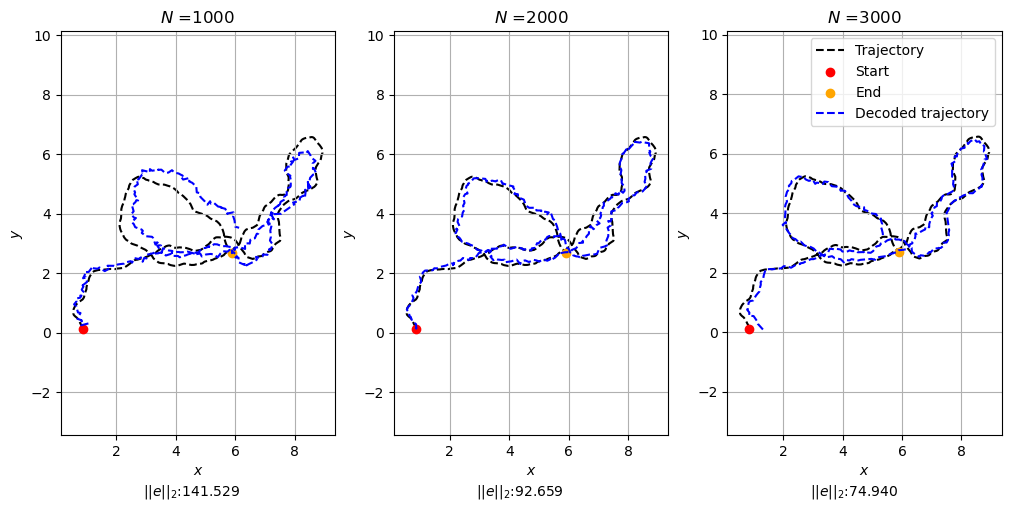

In [232]:
N_list = [1000, 2000, 3000]
T = 3000
tau = 12
theta = 15*np.pi/180

fig, ax = plt.subplots(1, 3, figsize=(10, 5), constrained_layout=True)
# plt.tight_layout()
# fig.set_constrained_layout_pads(w_pad=0, h_pad=0, wspace=0.5, hspace=3000)
# defining smooth random trajectory    
head_dirs, positions = sim.smooth_random_trajectory(T, ct.delta_t, speed, max_delta_theta)
for i, N in enumerate(N_list):

    # defining head population and running spike simulation to get spikes
    head_population = PoissonNeuron(I_0=1, theta_H=head_dirs, N=N, T = T, tau=tau)
    h,s = head_population.spike_simulation(input_fct=head_population.head_external_input, initial_voltage=np.random.uniform(0, 1, N))

    # defining the integrator for the x value of the path
    integrator_x = TwoPopulationSimulation(J_head=1.75, head_population=head_population, N = N, T = T, J=3, theta=theta, tau=tau)
    hL_x, sL_x, hR_x, sR_x = integrator_x.simulation(initial_voltage=integrator_x.centered_voltage)

    # defining the integrator for the y value of the path
    integrator_y = TwoPopulationSimulation(J_head=1.75, head_population=head_population, x=False, N = N, T = T, J=3, theta=theta, tau=tau)
    hL_y, sL_y, hR_y, sR_y = integrator_y.simulation(initial_voltage=integrator_y.centered_voltage)
    
    sL10_x = sim.bins_spike(sL_x, 10, N=N)
    sR10_x = sim.bins_spike(sR_x, 10, N=N)
    sL10_y = sim.bins_spike(sL_y, 10, N=N)
    sR10_y = sim.bins_spike(sR_y, 10, N=N)

    bump_locationL_x = sim.get_bump(sL10_x, N = N)
    bump_locationR_x = sim.get_bump(sR10_x, N = N)
    bump_locationL_y = sim.get_bump(sL10_y, N = N)
    bump_locationR_y = sim.get_bump(sR10_y, N = N)

    time = np.linspace(0, ct.T, len(bump_locationL_x))
    x = 0.5*(np.array(bump_locationL_x) + np.array(bump_locationR_x))
    y = 0.5*(np.array(bump_locationL_y) + np.array(bump_locationR_y))
    
    coefficients_x = np.polyfit(x, positions[:, 0][::100], 1)
    coefficients_y = np.polyfit(y, positions[:, 1][::100], 1)
    x_posi = np.poly1d(coefficients_x)
    y_posi = np.poly1d(coefficients_y)
    
    ax[i].plot(positions[:, 0], positions[:, 1], label='Trajectory', color='black', ls='--', zorder=1)
    ax[i].scatter(positions[0, 0], positions[0, 1], color='red', label='Start', zorder=2)
    ax[i].scatter(positions[-1, 0], positions[-1, 1], color='orange', label='End', zorder=2)
    ax[i].plot(x_posi(x), y_posi(y), 'b--', label='Decoded trajectory')
    ax[i].set_xlabel(r'$x$')
    ax[i].set_ylabel(r'$y$')
    ax[2].legend()
    ax[i].grid(True)
    ax[i].axis('equal')
    
    ax[i].set_title(r'$N$ =' + f'{N}')
    ax[i].text(0.3, -0.15, r'$||e||_2$:' + f'{ metric_path(positions[:,0][::100], positions[:,1][::100], x_posi(x), y_posi(y)):.3f}', transform=ax[i].transAxes)


plt.show()


In [233]:
fig.savefig('3_7.png', dpi=600)